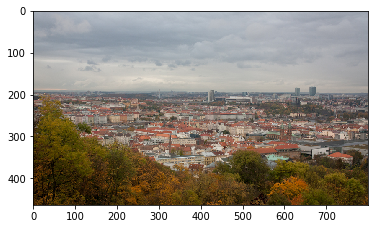

In [1]:
%matplotlib inline
import kornia
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

img = Image.open('img/prague.png')
timg = kornia.utils.image_to_tensor(np.array(img)).float() / 255.
plt.imshow(kornia.utils.tensor_to_image(timg[0]))


In [2]:
#Lets read pre-detected features in Oxford affine ellipse [x y a b c] format
ells = torch.from_numpy(np.loadtxt('img/prague.hesaffnet', skiprows=2)).float()
print (ells.shape)
print(ells[0])

torch.Size([2000, 5])
tensor([ 4.4487e+02,  3.2709e+02,  7.1538e-04, -6.9498e-05,  1.0999e-03])


In [3]:
#Now, lets convert ellipses into kornia LAF format:
laf = kornia.feature.ellipse_to_laf(ells.unsqueeze(0))

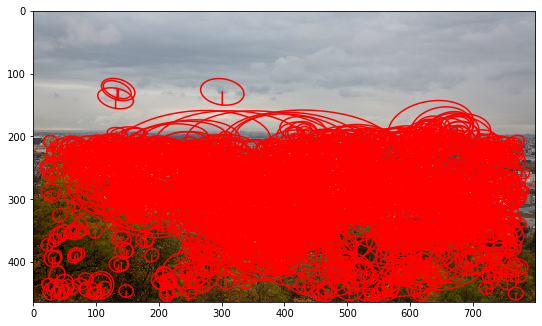

In [4]:
def visualize_laf(timg, laf, img_idx = 0):
    x, y = kornia.feature.laf.get_laf_pts_to_draw(laf, img_idx)
    plt.figure(figsize=(9,6))
    plt.imshow(kornia.utils.tensor_to_image(timg[img_idx]))
    plt.plot(x, y, 'r')
    plt.show()
    return
visualize_laf(timg, laf)

In [5]:
#Now, lets extract some patches
patches_aliased = kornia.feature.extract_patches_simple(timg,
                                                        kornia.feature.normalize_laf(laf,timg))
patches_nice =  kornia.feature.extract_patches_from_pyramid(timg, 
                                                            kornia.feature.normalize_laf(laf,timg))


/opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_1565272271120/work/aten/src/ATen/native/IndexingUtils.h:20: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead.
/opt/conda/conda-bld/pytorch_15652722711

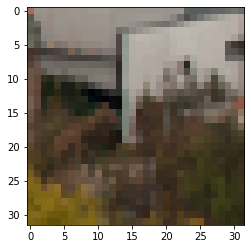

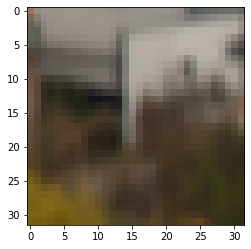

In [6]:
idx = 102
pim = kornia.utils.tensor_to_image(patches_aliased[0,idx:idx+1])
plt.imshow(pim)
pimp = kornia.utils.tensor_to_image(patches_nice[0,idx:idx+1])
plt.figure()
plt.imshow(pimp)


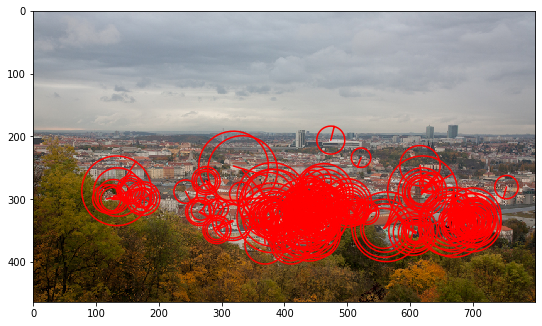

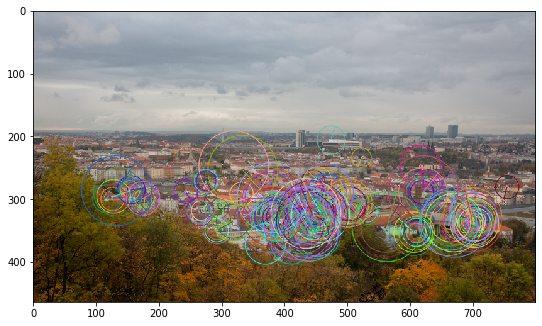

In [8]:
#Also, we can convert from OpenCV keypoints
import cv2
ORBdet = cv2.ORB_create(200)
np_img = (255*kornia.tensor_to_image(timg)).astype(np.uint8)
kps = ORBdet.detect(np_img, None)
lafs_orb = kornia.create_lafs_from_opencv_kps(kps, 1.0)
visualize_laf(timg, lafs_orb)
plt.figure(figsize=(9,6))
cv2_vis_img = None
cv2_vis_img = cv2.drawKeypoints(np_img, kps, cv2_vis_img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2_vis_img)